# Simple Example

In [1]:
import sys
sys.path.append('path_to_logomaker')
import logomaker as lm

Description of example matrix "crp_energy_matrix":
# 
# CRP energy matrix from Kinney et al. (2010).
# Matrix values are in units of kcal/mol.
# 
# References
# 
# Kinney JB et al. (2010) Using deep sequencing to characterize the
# biophysical mechanism of a transcriptional regulatory sequence.
# Proc Natl Acad Sci USA. 107(20):9158–63.
# 



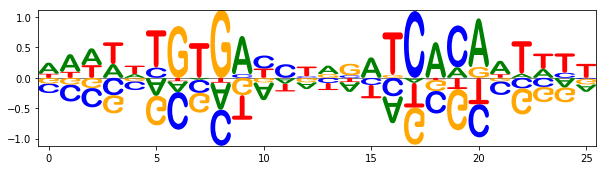

In [2]:
crp_df = -lm.get_example_matrix('crp_energy_matrix')
logo = lm.Logo(crp_df, font_name = 'Arial Rounded MT Bold')

# Basic Styling

Description of example matrix "crp_energy_matrix":
# 
# CRP energy matrix from Kinney et al. (2010).
# Matrix values are in units of kcal/mol.
# 
# References
# 
# Kinney JB et al. (2010) Using deep sequencing to characterize the
# biophysical mechanism of a transcriptional regulatory sequence.
# Proc Natl Acad Sci USA. 107(20):9158–63.
# 



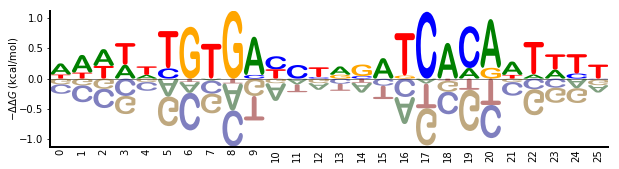

In [3]:
### CRP panel

# load crp energy matrix
crp_df = -lm.get_example_matrix('crp_energy_matrix')

# create and style logo
logo = lm.Logo(crp_df, 
               #ax=ax,
               shade_below=.5, 
               fade_below=.5, 
               font_name='Arial Rounded MT Bold')

logo.style_spines(visible=False)
logo.style_spines(spines=['left','bottom'], visible=True, linewidth=2)
logo.ax.set_ylabel("$-\Delta \Delta G$ (kcal/mol)", labelpad=-1)

logo.style_xticks(rotation=90, fmt='%d', anchor=0)
logo.ax.xaxis.set_ticks_position('none') 
logo.ax.xaxis.set_tick_params(pad=-1);

Text(0,0.5,'$-\\Delta \\Delta G$ (kcal/mol)')

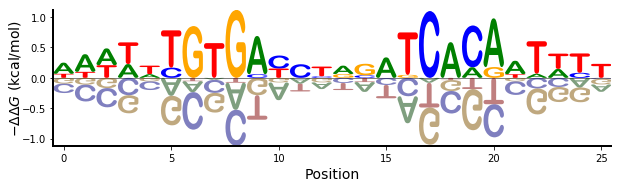

In [4]:
logo = lm.Logo(df=crp_df,
                      center_values=True,
                      font_name='Arial Rounded MT Bold',
                      fade_below=0.5,
                      shade_below=0.5)

# style logo spines
logo.style_spines(visible=False)
logo.style_spines(spines=['left','bottom'], visible=True, linewidth=2)

# set axes labels
logo.ax.set_xlabel('Position',fontsize=14)
logo.ax.set_ylabel("$-\Delta \Delta G$ (kcal/mol)", labelpad=-1,fontsize=14)

In [5]:
crp_sites = lm.open_example_datafile('crp_sites.fa')

Description of example matrix "crp_sites.fa":
# 
# CRP binding sites from RegulonDB, in FASTA format.
# 
# References
# 
# Salgado H, et al. (2013) RegulonDB v8.0: omics data sets, evolutionary
# conservation, regulatory phrases, cross-validated gold standards
# and more. Nucl Acids Res. 41(Database issue):D203–13.
# 
# 



In [6]:
with open(crp_sites.name, 'r') as f:
    raw_seqs = f.readlines()
raw_seqs[:20]

['# \n',
 '# CRP binding sites from RegulonDB, in FASTA format.\n',
 '# \n',
 '# References\n',
 '# \n',
 '# Salgado H, et al. (2013) RegulonDB v8.0: omics data sets, evolutionary\n',
 '# conservation, regulatory phrases, cross-validated gold standards\n',
 '# and more. Nucl Acids Res. 41(Database issue):D203–13.\n',
 '# \n',
 '# \n',
 '>0\tcaiFp\t-41.5\n',
 'ATAAGCAGGATTTAGCTCACACTTAT\n',
 '>1\tcaiTp\t-41.5\n',
 'AAAAATGTGATACCAATCACAGAATA\n',
 '>2\tfixAp\t-126.5\n',
 'ATATTGGTGATCCATAAAACAATATT\n',
 '>3\tfixAp\t-69.5\n',
 'ATATTGGTGAGGAACTTAACAATATT\n',
 '>4\taraBp\t-93.5\n',
 'GATTATTTGCACGGCGTCACACTTTG\n']

In [7]:
# extract binding site sequences from FASTA lines
seqs = [seq.strip() for seq in raw_seqs if ('#' not in seq) and ('>') not in seq]

# preview sequences
seqs[:10]

['ATAAGCAGGATTTAGCTCACACTTAT',
 'AAAAATGTGATACCAATCACAGAATA',
 'ATATTGGTGATCCATAAAACAATATT',
 'ATATTGGTGAGGAACTTAACAATATT',
 'GATTATTTGCACGGCGTCACACTTTG',
 'CAAAGTGTGACGCCGTGCAAATAATC',
 'CTTTCTTCGTAACGCCTCGCAAATTT',
 'TTATATGTGGTGCTAATACCCGGTTC',
 'GAACCGGGTATTAGCACCACATATAA',
 'AGAAGTTTGAATTGTTACAAAAAGAC']

In [8]:
seqs[10:15]

['ACATTTGTGCATAGTTACAACTTTGA',
 'CGTTATATATGTCAAGTTGTTAAAAT',
 'CAAGTTGTTAAAATGTGCACAGTTTC',
 'TAAAATGTGCACAGTTTCATGATTTC',
 'AGTTTCATGATTTCAATCAAAACCTG']

In [9]:
counts_mat = lm.alignment_to_matrix(seqs[10:])
counts_mat.head()

,A,C,G,T
pos,,,,
0,128.0,63.0,70.0,87.0
1,143.0,46.0,57.0,102.0
2,158.0,26.0,38.0,126.0
3,160.0,27.0,43.0,118.0
4,130.0,43.0,44.0,131.0


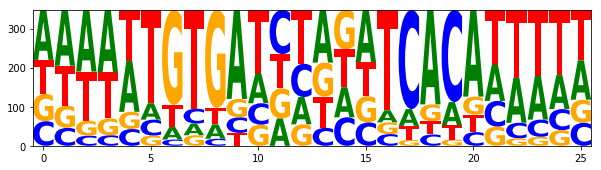

In [10]:
lm.Logo(counts_mat)

# Matrices

## Transform Matrix: counts to weight

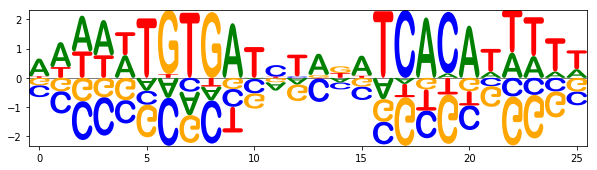

In [11]:
weight_mat = lm.transform_matrix(counts_mat,
                                        from_type='counts',
                                        to_type='weight')
lm.Logo(weight_mat, center_values=True,font_name='Arial Rounded MT Bold')

## counts to information

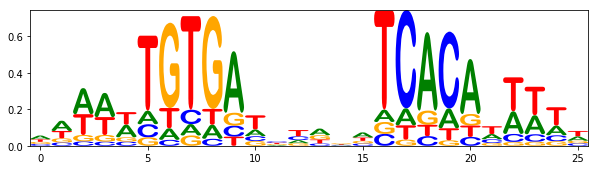

In [12]:
info_mat = lm.transform_matrix(counts_mat,
                                 from_type='counts',
                                 to_type='information')

lm.Logo(info_mat,font_name='Arial Rounded MT Bold')

## counts to information: matrix WW domain

# 
# WW domain alignment in FASTA format.
# From PFAM, RP15 (4025)
# http://pfam.xfam.org/family/PF00397#tabview=tab3
# 
# References
# 
# Finn RD et al. (2014) Pfam: the protein families database.
# Nucl Acids Res. 42(Database issue):D222–30.
# 
>B7G9D5/250-280
LPPQW..TEA.VDVDT...GKFYFVHVET.......KETRWERP
>B7G9D5/328-356
--PGW..TAT.VDPAS...GRTYYYHAAT.......GETRWEPP
>B7G9D5/387-417
LPSGW..VEQ.TDPSS...GRPYYYHNAS.......NLTQWERP
>B7G9D5/503-533
LPAGW..VAA.NDPSS...GRTYYYHAES.......GVTSWNPP
>B7G9D5/626-656
LPNGW..QEL.VDPSS...GSTYYYNEVN.......GTTSWDRP



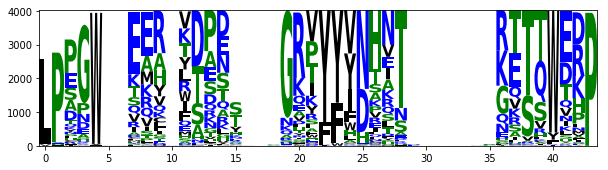

In [13]:
# load ww alignment
with lm.open_example_datafile('ww_sequences.fa', print_description=False) as f:
    lines = f.readlines()
    
# preview loaded file
print(''.join(lines[:20]))

# extract ww domain sequences
seqs = [seq.strip().upper() for seq in lines if ('#' not in seq) and ('>') not in seq]

# preview sequences
seqs[:10]

# create counts matrix
ww_counts_df = lm.alignment_to_matrix(sequences=seqs, to_type='counts', characters_to_ignore='.-X')

# show full ww counts
lm.Logo(ww_counts_df)

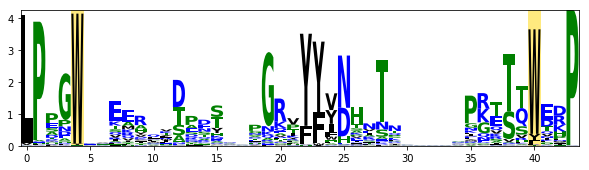

In [14]:
# transform to information matrix
ww_info_df = lm.transform_matrix(ww_counts_df, from_type='counts', to_type='information')

# show logo
logo = lm.Logo(ww_info_df)

# highlight position of 2 W's
logo.highlight_position(p=4, color='gold', alpha=.5)
logo.highlight_position(p=40, color='gold', alpha=.5)

## Sequence to matrix: IUPAC

In [15]:
# Create CRP logo from IUPAC motif
iupac_seq = 'WWNTGTGANNNNNNTCACANWW'
iupac_mat = lm.sequence_to_matrix(iupac_seq,  is_iupac=True)
iupac_mat.head()

,A,C,G,T
pos,,,,
0,0.50,0.00,0.00,0.50
1,0.50,0.00,0.00,0.50
2,0.25,0.25,0.25,0.25
3,0.00,0.00,0.00,1.00
4,0.00,0.00,1.00,0.00


# Saliency to matrix: SpliceAI

In [16]:
import pandas as pd

# load saliency data
with lm.open_example_datafile('nn_saliency_values.txt') as f:
    saliency_data_df = pd.read_csv(f, comment='#', sep='\t')
    
# preview dataframe
saliency_data_df.head()

Description of example matrix "nn_saliency_values.txt":
# 
# Saliency values illustrated in Figure 1F.
# Data are from Figure 1D of Janganathan et al. (2019),
# and were kindly provided by Kyle Farh and Kishore Jaganathan.
# 
# References:
# 
# Jaganathan K et al. (2019) Predicting Splicing from Primary Sequence with
# Deep Learning. Cell. 176(3):535–548.e24.
# 



,character,value
0,G,-0.001725
1,G,0.033557
2,G,0.030026
3,G,0.012748
4,G,0.000337


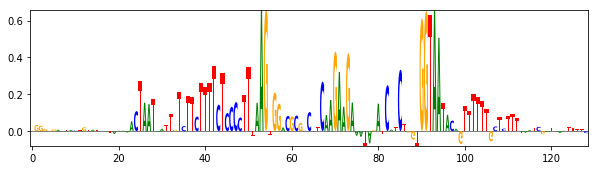

In [17]:
# create saliency matrix
saliency_mat_df = lm.saliency_to_matrix(seq=saliency_data_df['character'], 
                                               values=saliency_data_df['value'])

# show logo
lm.Logo(saliency_mat_df)